In [1]:
# Prevendo o nivel de satisfacao dos clientes do Santander
# Projeto com FeedBack 3

In [2]:
# Ola equipe da DSA...
# Consegui uma acuracia de 71.1%
# Além do Feedback de voces, comento alguns desafios e duvidas que tive durante a construcao desse modelo...

# Usei como referencia as video aulas e pesquisei para conseguir manipular conjunto de dados com muitas variaveis. E por isso,
# tenho algumas duvidas:
# 1. Nesse caso que temos uma base com a variavel Target desbalanceada. Tentei usar o SMOTE (que foi comentado pelo Daniel
#     em um dos videos), mas nao tive sucesso. Usar o SMOTE é o melhor metodo? Ou existe outro metodo? Podem indicar algum link para que eu possa estudar. 
# 2. Queria dicas das melhores praticas quando se trabalha com conjunto de dados com muitos atributos, como esse que possui 370.
#    Por exemplo: 
#         Na parte de analise exploratoria, É necessario fazer as analises de correlacao? Como identificamos as dimensoes 
#            das variaveis? E existe alguma maneira automatica de separar as variaveis Qualitativas?.
#           >> Eu usei o Excel para ajudar a resolver alguns pontos da analise exploratoria, mas sei que nao é a melhor opcao...
#         Na parte do Pre Processamento, Qual a melhor maneira de fazer a Padronizacao, Normalizacao, excluindo-se uma quantidade
#             grande de variaveis Qualitativas? Nesses casos é melhor continuar no formato DataFrame ou usar Arrays?
#
# Desde já agradeço!
#

In [3]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.20.3'

In [4]:
# Carregando os pacotes Python
import numpy as num
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
#from imblearn import under_sampling, over_sampling
#from imblearn.over_sampling import SMOTE


In [5]:
# Carregando os dados 
df_treino = pd.read_csv("train.csv")
df_treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
# Distribuição das classes
# Verificamos que as classes ESTAO DESBALANCEADAS!!
df_treino.groupby("TARGET").size()
# TARGET
# 0    73.012
# 1     3.008
# dtype: int64

# Criando dataframe dos Target = 0 e gerando uma amostra aleatoria de 3.008 registros
df1 = df_treino[df_treino.TARGET == 1 ]

df0 = df_treino[df_treino.TARGET == 0 ]
df0 = df0.sample(n=3009, random_state=12)

# Juntando os registros de Target=1 e 0
df_train = pd.concat( [df0, df1] ) 
df_train.groupby("TARGET").size()

TARGET
0    3009
1    3008
dtype: int64

In [7]:
# Transformando o ID em Indice
df_treino1 = df_train.set_index("ID")
df_treino1.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
58884,2,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
80710,2,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71230.290000,0
141012,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
16522,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55736.460000,0
111093,2,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253377.540000,0


In [8]:
# Normalizando os atributos Quantitativos, ou seja, retirando a variavel target e as variaveis de indicadores (ind_var)
escala = MinMaxScaler(feature_range = (0, 1))
df_treino1[[col for col in df_treino1.columns if 'ind_var' not in col if 'TARGET' not in col ]] = escala.fit_transform(df_treino1[[col for col in df_treino1.columns if 'ind_var' not in col if 'TARGET' not in col ]].to_numpy())
df_treino1.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
58884,0.999777,0.223404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012809,0
80710,0.999777,0.372340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007483,0
141012,0.999777,0.191489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012809,0
16522,0.999777,0.159574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005693,0
111093,0.999777,0.521277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028535,0


In [9]:
scaler = StandardScaler().fit(df_treino1[[col for col in df_treino1.columns if 'ind_var' not in col if 'TARGET' not in col ]])
df_treino1[[col for col in df_treino1.columns if 'ind_var' not in col if 'TARGET' not in col ]] = scaler.transform(df_treino1[[col for col in df_treino1.columns if 'ind_var' not in col if 'TARGET' not in col ]].to_numpy())
df_treino1.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
58884,0.036472,-0.581795,-0.073995,-0.202502,-0.225724,-0.044797,-0.049331,-0.039124,-0.040423,-0.041413,...,-0.0214,-0.022205,-0.021321,-0.021541,-0.020186,-0.014667,-0.028866,-0.026755,0.042136,0
80710,0.036472,0.506114,-0.073995,-0.202502,-0.225724,-0.044797,-0.049331,-0.039124,-0.040423,-0.041413,...,-0.0214,-0.022205,-0.021321,-0.021541,-0.020186,-0.014667,-0.028866,-0.026755,-0.228655,0
141012,0.036472,-0.814918,-0.073995,-0.202502,-0.225724,-0.044797,-0.049331,-0.039124,-0.040423,-0.041413,...,-0.0214,-0.022205,-0.021321,-0.021541,-0.020186,-0.014667,-0.028866,-0.026755,0.042136,0
16522,0.036472,-1.048041,-0.073995,-0.202502,-0.225724,-0.044797,-0.049331,-0.039124,-0.040423,-0.041413,...,-0.0214,-0.022205,-0.021321,-0.021541,-0.020186,-0.014667,-0.028866,-0.026755,-0.319704,0
111093,0.036472,1.594024,-0.073995,-0.202502,-0.225724,-0.044797,-0.049331,-0.039124,-0.040423,-0.041413,...,-0.0214,-0.022205,-0.021321,-0.021541,-0.020186,-0.014667,-0.028866,-0.026755,0.841726,0


In [11]:
# Reducao de dimensionalidade
pca = PCA(n_components = 10)
fit = pca.fit(df_treino1)

In [12]:
# Extracao das variaveis preditoras e target
X=df_treino1.drop(["TARGET"], axis=1)
Y=df_treino1["TARGET"]

# Separacao dos dados de treino e teste
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = .25, random_state=12)

In [13]:
# Definindo os valores para os folds
num_folds = 15

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = 12)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, train_X, train_Y, cv = kfold, scoring="accuracy")

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 71.145%


In [14]:
# Fazendo as previsões e construindo a Confusion Matrix
modelo.fit(train_X, train_Y)
previsoes = modelo.predict(test_X)
matrix = confusion_matrix(test_Y, previsoes)

report = classification_report(test_Y, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

# Imprimindo o relatório
print(report)



[[487 229]
 [215 574]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       716
           1       0.71      0.73      0.72       789

   micro avg       0.70      0.70      0.70      1505
   macro avg       0.70      0.70      0.70      1505
weighted avg       0.70      0.70      0.70      1505



In [15]:
# TESTANDO OUTRO MODELOS

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
#modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []
seed=12
for nome, modelo in modelos:
    kfold = KFold(num_folds, True, random_state = seed)
    
    cv_results = cross_val_score(modelo, train_X, train_Y, cv = kfold, scoring = 'accuracy')

    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.711448 (0.027266)
LDA: 0.513952 (0.060499)
NB: 0.527025 (0.028926)
KNN: 0.710329 (0.021447)
CART: 0.681959 (0.025442)


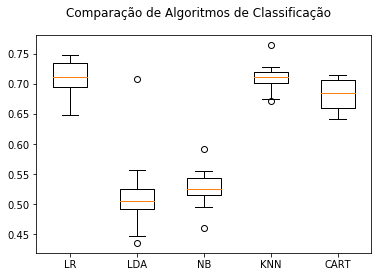

In [16]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()